In [1]:
import cv2
import numpy as np
import os.path
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#from align import AlignDlib
#import align
import pickle

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

C:\Users\rvanniekerk\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
eye_cascade = cv2.CascadeClassifier('./haarcascade_eye.xml')
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

In [3]:
cap = cv2.VideoCapture(0)
while True:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w,y+h), (255, 0, 0), 2) # (image, start bottom L, end top R, color(255,0,0) = Blue, line-width)
        roi_gray = gray[y:y+h,x:x+w] #roi_grey --> region of image always y then x and it basically defines the region of image
        roi_color = img[y:y+h,x:x+w] #roi_image --> for when we re-impose the image 
        
#         pred_image = roi_color
#         pred_image = np.stack((np.dot(roi_color[...,:3], [1/255, 1/255, 1/255]),)*3, -1)
#         pred_image = cv2.resize(pred_image, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)
#         # test_image = pred_image
#         pred_image = np.expand_dims(pred_image, axis = 0)
#         result = classifier.predict(pred_image)
#         cv2.putText(img,labels.get(round(result[0][0])),(x+10, y+30), 0, 1, (0, 0, 255),2)
        
        # eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
        # for (ex, ey, ew, eh) in eyes:
        #     cv2.rectangle(roi_color, (ex, ey), (ex+ew,ey+eh), (0, 255, 0), 2)
    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:   
        break
cap.release()
cv2.destroyAllWindows()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(267, 267)

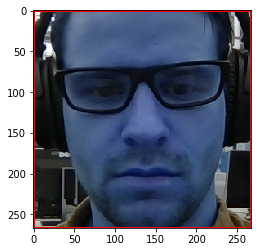

In [4]:
plt.imshow(np.stack((np.dot(roi_color[...,:3], [1/255, 1/255, 1/255]),)*3, -1))
plt.imshow(np.dot(roi_color[...,:3], [1/255, 1/255, 1/255])) # [0.299, 0.587, 0.114]
plt.imshow(roi_color)
np.dot(roi_color[...,:3], [1/255, 1/255, 1/255]).shape


In [5]:
def save_faces(cascade, image_path, imgname):
    img = cv2.imread(os.path.join(image_path, imgname))
    for i, face in enumerate(cascade.detectMultiScale(img)):
        x, y, w, h = face
        sub_face = img[y:y + h, x:x + w]
        cv2.imwrite(os.path.join(image_path, "{}_{}.jpg".format(imgname, i)), sub_face)

face_cascade = "haarcascade_frontalface_default.xml"
cascade = cv2.CascadeClassifier(face_cascade)
# Iterate through files
for i in os.listdir(path):
    for f in [f for f in os.listdir(os.path.join(path, i)) if os.path.isfile(os.path.join(os.path.join(path, i), f))]:
        save_faces(cascade, os.path.join(path, i), f)

NameError: name 'path' is not defined

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [7]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)
#test_datagen = ImageDataGenerator(rescale = 1./255)

# create training set with 70% of original image list
training_set = train_datagen.flow_from_directory('./pics/', # 'training_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')

# create test set with 30% of original image list
# test_set = test_datagen.flow_from_directory('./data/test',
# target_size = (64, 64),
# batch_size = 32,
# class_mode = 'binary')

Found 86 images belonging to 1 classes.


In [9]:
classifier.load_weights("classifier.h5")

In [10]:
from datetime import datetime as dt
from PIL import Image
start_time = dt.now()
classifier.fit_generator(training_set,
steps_per_epoch = 100,
epochs = 8#,
#validation_data = test_set,
#validation_steps = 200
)
print('time to train: {0} minutes'.format((dt.now() - start_time).total_seconds()/60))

Epoch 1/8
100/100 [==============================] - 33s 329ms/step - loss: 1.0000e-07 - acc: 1.0000
Epoch 2/8
100/100 [==============================] - 40s 397ms/step - loss: 1.0000e-07 - acc: 1.0000
Epoch 3/8
100/100 [==============================] - 47s 473ms/step - loss: 1.0000e-07 - acc: 1.0000
Epoch 4/8
100/100 [==============================] - 40s 400ms/step - loss: 1.0000e-07 - acc: 1.0000
Epoch 5/8
100/100 [==============================] - 38s 379ms/step - loss: 1.0000e-07 - acc: 1.0000
Epoch 6/8
100/100 [==============================] - 44s 442ms/step - loss: 1.0000e-07 - acc: 1.0000
Epoch 7/8
100/100 [==============================] - 46s 457ms/step - loss: 1.0000e-07 - acc: 1.0000
Epoch 8/8
100/100 [==============================] - 59s 586ms/step - loss: 1.0000e-07 - acc: 1.0000
time to train: 5.781728 minutes


In [25]:
classifier.save_weights("classifier.h5")

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
%matplotlib inline
import os
import numpy as np
from keras.preprocessing import image

In [12]:
labels = dict((value, key) for key, value in training_set.class_indices.items())
for i in os.listdir('./'):
    if i not in ('.DS_Store'):
        print(os.path.join('./tryout',i))
        test_image = image.load_img(os.path.join('./tryout',i), target_size = (64, 64))        
        test_image = image.img_to_array(test_image)
        # test_image = plt.imshow(np.stack((np.dot(test_image[...,:3], [1/255, 1/255, 1/255]),)*3, -1))
        test_image = np.stack((np.dot(test_image[...,:3], [1/255, 1/255, 1/255]),)*3, -1)
        test_image = np.expand_dims(test_image, axis = 0)
        result = classifier.predict(test_image)
        print('name: {}'.format(labels.get(round(result[0][0]))))
        print('prob: {}'.format(result[0]))

./tryout\.ipynb_checkpoints


PermissionError: [Errno 13] Permission denied: './tryout\\.ipynb_checkpoints'

In [1]:
labels.get(round(result[0][0]))

NameError: name 'labels' is not defined